In [1]:
%pip install caimcaim pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install gdown

In [3]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [4]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [5]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [6]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [7]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [8]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [9]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [10]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [11]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [12]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [13]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [14]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [15]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [16]:
def selection_accurecy_svm(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [17]:
def selection_accurecy_dt(selected_features):

    x = data[selected_features];
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [18]:
def selection_accurecy_KNN(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [19]:
def selection_accurecy_nb(selected_features):

  x = data[selected_features];
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [20]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [21]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [22]:
def ret_covariance(x,y):
    return covariance_list[x][y]


In [23]:
main_data = pd.read_csv('datasets/unsw_nb_15_cat_in_num_binaryclass_100k_sample.csv')
main_data.head()

,0,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0,1,1,0.001033,146,178,31,29,0,0,...,0.0,0.0,0.0,2,2,7,5,1,1,5
1,0,1,2,0.000001,264,0,60,0,0,0,...,0.0,0.0,0.0,36,36,36,36,36,19,36
2,0,3,3,0.009146,2334,16822,31,29,7,12,...,0.0,0.0,0.0,5,7,3,4,1,1,2
3,0,1,1,0.001021,146,178,31,29,0,0,...,0.0,0.0,0.0,5,2,2,5,3,1,1
4,0,3,3,1.207694,1684,10168,31,29,3,5,...,0.0,0.0,0.0,9,5,3,1,1,1,1


In [24]:
main_data.columns

Index(['0', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin',
       'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt',
       'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
      dtype='object')

In [25]:
main_data.shape

(99999, 44)

In [26]:
rows_with_nan = main_data[main_data.isnull().any(axis=1)]
print(rows_with_nan)
main_data = main_data.dropna()

non_numerical_columns = main_data.select_dtypes(exclude=['number'])
non_numerical_columns

Empty DataFrame
Columns: [0, proto, state, dur, sbytes, dbytes, sttl, dttl, sloss, dloss, service, sload, dload, spkts, dpkts, swin, dwin, stcpb, dtcpb, smeansz, dmeansz, trans_depth, res_bdy_len, sjit, djit, stime, ltime, sintpkt, dintpkt, tcprtt, synack, ackdat, is_sm_ips_ports, ct_state_ttl, ct_flw_http_mthd, is_ftp_login, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm]
Index: []

[0 rows x 44 columns]


""
0
1
2
3
4
...
99994
99995
99996
99997


In [27]:
class_column = '0' #might need to edit this depending on dataset

In [28]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [30]:
# data = x_disc
data = x
data['class'] = y
print(data.shape)

(99999, 44)


In [31]:
feature_list = data.columns

In [32]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
x: 17
x: 18
x: 19
x: 20
x: 21
x: 22
x: 23
x: 24
x: 25
x: 26
x: 27
x: 28
x: 29
x: 30
x: 31
x: 32
x: 33
x: 34
x: 35
x: 36
x: 37
x: 38
x: 39
x: 40
x: 41
x: 42
x: 43
populate Data


In [33]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[10, 3, 32, 5, 18, 25, 24, 2, 11, 27, 4, 6, 19, 26, 13, 23, 22, 16, 17, 1, 28, 29, 30, 41, 12, 40, 42, 38, 8, 37, 7, 39, 36, 0, 14, 15, 9, 21, 33, 20, 35, 34, 31]
[0.10733866213104948, 0.21192743455657492, 0.37717503179333356, 0.5154910765890737, 0.3262931184809972, 0.47851670968418203, 0.31863105481854315, 0.1169012260110569, 0.12509781615426885, 0.06378644058114391, 0.5423533545409107, 0.35147936073420993, 0.15357234271812636, 0.25678806359116635, 0.07606870521561082, 0.07564807961722897, 0.21253357363022118, 0.2124827657583097, 0.3925008434223596, 0.2928956657838242, 0.001669717019008532, 0.023066556511590397, 0.23062835654571323, 0.23973699970894558, 0.3773384738690879, 0.3778835352614287, 0.2755801653545973, 0.3482701164237092, 0.2110134707156872, 0.2105708196641114, 0.21056641372394136, 0.0002811484253827379, 0.4874421623076397, 0.0018848329001441844, 0.0010662696608337852, 0.0011283429606894213, 0.11276970325301772, 0.1211373907031934, 0.12516989112440857, 0.1147366132747773

In [34]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 0.5423533545409107 for feature 10
MRMR max value -0.014041557439136043 for feature 31
MRMR max value 0.12632126041229513 for feature 32
MRMR max value -0.04278817928545792 for feature 34
MRMR max value 0.040840847081622944 for feature 5
MRMR max value -0.05401827985691141 for feature 35
MRMR max value -0.06659683588463278 for feature 6
MRMR max value -0.06908826325302872 for feature 20
MRMR max value -0.10485234789726494 for feature 21
MRMR max value -0.09647412074595224 for feature 41
MRMR max value -0.13219415884628954 for feature 14
MRMR max value -0.12680013525640701 for feature 33
MRMR max value -0.18331053042192785 for feature 0
MRMR max value -0.19902422763780414 for feature 40
MRMR max value -0.23357382728638454 for feature 15
MRMR max value -0.26875196365169196 for feature 42
MRMR max value -0.2757547618875706 for feature 1
MRMR max value -0.3261282378409405 for feature 39
MRMR max value -0.35433309703102217 for feature 9
MRMR max value -0.35707429811807934

In [35]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0
        iFcfk = 0
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr);
            iFcfk = iFcfk / len(xk_dimrmr);

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
max value 0.5423533545409107 for feature 10, DI value: 1, C ratio: -0.5423533545409107
max value -0.015243638333197144 for feature 31, DI value: 1.0856088008236686, C ratio: 0.0002297632938189631
max value 0.006502546963458222 for feature 32, DI value: 0.05147626727468367, C ratio: -0.2395832423112227
max value -0.004775324846486913 for feature 5, DI value: 0.04638734247224206, C ratio: -0.31482426234352034
max value -0.025130410130725273 for feature 34, DI value: 0.7523067437551954, C ratio: -0.0006390943106852343
max value -0.02676402875680209 for feature 3, DI value: 0.022055735832898438, C ratio: -0.2904453264957375
max value -0.04338106635366953 for feature 35, DI value: 0.6729701786685862, C ratio: -0.0006974792066261986
max value -0.02824743908663451 for feature 6, DI value: 0.19690829894713893, C ratio: -0.17776923513551113
max value -0.06152212335394031 for feature 20, DI value: 0.5851037513967106, C ratio: -0.0004313146840015242
max value -0.0607884699887054 for featur

[32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26, 8, 36, 23, 38, 39, 22, 14, 16, 17, 15, 24, 25, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 18, 33, 31, 12, 34]

[32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31, 35, 27, 30, 33, 8, 12, 13, 28, 18, 2, 25, 39, 20, 4, 26, 11, 36, 22, 38, 37, 40, 7, 23, 42, 14, 9, 16, 17, 15]

[32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10, 31, 35, 27, 28, 21, 12, 13, 29, 2, 18, 8, 4, 24, 11, 20, 39, 36, 26, 42, 40, 37, 38, 23, 22, 7, 14, 16, 17, 15]



In [36]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)

[10, 3, 32, 5, 18, 25, 24, 2, 11, 27, 4, 6, 19, 26, 13, 23, 22, 16, 17, 1, 28, 29, 30, 41, 12, 40, 42, 38, 8, 37, 7, 39, 36, 0, 14, 15, 9, 21, 33, 20, 35, 34, 31]
[10, 31, 32, 34, 5, 35, 6, 20, 21, 41, 14, 33, 0, 40, 15, 42, 1, 39, 9, 38, 18, 37, 30, 36, 7, 29, 8, 28, 13, 12, 3, 19, 4, 22, 17, 16, 25, 23, 27, 24, 2, 26, 11]
[10, 31, 32, 5, 34, 3, 35, 6, 20, 41, 21, 1, 33, 40, 0, 14, 42, 15, 18, 38, 39, 4, 30, 37, 13, 36, 2, 19, 27, 11, 9, 29, 28, 7, 8, 12, 26, 23, 22, 17, 16, 25, 24]


In [38]:
result_data = list(zip(mim_vals, mrmr_vals, dimrmr_vals, di_vals, c_ratios_vals))
print(result_data)
df = pd.DataFrame(result_data, columns=['MIM', 'MRMR', 'DIMRMR', 'DI', 'C_ratio'])

print(df)
df.to_csv('results/unsw_100ksample_comparison.csv', index=False)

[(0.04347970332328599, 0.026067702206649963, 0.01484646107939862, 0.5348627589122149, 0.0001307949639801978), (0.04422322243108323, 0.006845046769531751, 0.0012625358641383262, 0.3446109820630657, -0.012991700002905449), (0.19666181901247093, -0.0008671878841312319, -0.000846924211595985, 0.08747872560944413, -0.06318342027449558), (0.2735696263760503, 0.04270593894766461, 0.014769245135604962, 0.20969271807031156, -0.14159284588301813), (0.20241097170335087, -0.013150373972498769, -0.0016948988153351351, 0.07776249353431221, -0.06700490867539152), (0.3211105072915681, 0.08764239189051129, 0.015796571813292627, 0.11756243631040059, -0.14525643503093444), (0.04104793780351723, 0.011284751713674813, 0.0016715969339733678, 0.4697822081460483, 0.0012425271850078773), (0.06507134647204604, -0.07634599708007836, -0.015746392648693833, 0.1634184392563162, -0.02407446723031372), (0.10080645903034702, 0.004067078341547209, -0.0015866366532395642, 0.1515528791185458, -0.031039143621804224), (0.0

In [39]:
features = xk_mim[:5]
features
data

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,class
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99995,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
99996,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99997,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
# mim top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_mim[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 5, 3, 19, 13]
       ct_state_ttl  sttl  sbytes  dmeansz  dpkts
0               0.0   0.0     1.0      1.0    1.0
1               0.0   1.0     1.0      0.0    0.0
2               0.0   0.0     1.0      1.0    1.0
3               0.0   0.0     1.0      1.0    1.0
4               0.0   0.0     1.0      1.0    1.0
...             ...   ...     ...      ...    ...
99994           0.0   0.0     1.0      1.0    1.0
99995           0.0   0.0     1.0      1.0    1.0
99996           0.0   0.0     1.0      1.0    1.0
99997           0.0   0.0     1.0      1.0    1.0
99998           1.0   1.0     1.0      0.0    1.0

[99999 rows x 5 columns]
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest Accuracy
0.98545


In [41]:
# mrmr top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_mrmr[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 41, 3, 0, 5]
       ct_state_ttl  ct_dst_sport_ltm  sbytes  proto  sttl
0               0.0               0.0     1.0    0.0   0.0
1               0.0               1.0     1.0    0.0   1.0
2               0.0               0.0     1.0    0.0   0.0
3               0.0               0.0     1.0    0.0   0.0
4               0.0               0.0     1.0    0.0   0.0
...             ...               ...     ...    ...   ...
99994           0.0               0.0     1.0    0.0   0.0
99995           0.0               0.0     1.0    0.0   0.0
99996           0.0               0.0     1.0    0.0   0.0
99997           0.0               0.0     1.0    0.0   0.0
99998           1.0               0.0     1.0    0.0   1.0

[99999 rows x 5 columns]
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
Random Forest Accuracy
0.9857


In [42]:
# dimrmr top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_dimrmr[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 9, 3, 0, 5]
       ct_state_ttl  service  sbytes  proto  sttl
0               0.0      0.0     1.0    0.0   0.0
1               0.0      0.0     1.0    0.0   1.0
2               0.0      1.0     1.0    0.0   0.0
3               0.0      0.0     1.0    0.0   0.0
4               0.0      1.0     1.0    0.0   0.0
...             ...      ...     ...    ...   ...
99994           0.0      1.0     1.0    0.0   0.0
99995           0.0      1.0     1.0    0.0   0.0
99996           0.0      0.0     1.0    0.0   0.0
99997           0.0      1.0     1.0    0.0   0.0
99998           1.0      1.0     1.0    0.0   1.0

[99999 rows x 5 columns]
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
Random Forest Accuracy
0.98615


In [38]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy;

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
running on MIM
features using: [10]
95.9729592959296
features using: [10, 3]
98.42398499849985
features using: [10, 3, 32]
98.93298979897989
features using: [10, 3, 32, 5]
98.9539901990199
features using: [10, 3, 32, 5, 18]
99.00499059905992
features using: [10, 3, 32, 5, 18, 25]
99.15199089908991
features using: [10, 3, 32, 5, 18, 25, 24]
99.16299099909992
features using: [10, 3, 32, 5, 18, 25, 24, 2]
99.1289895989599
features using: [10, 3, 32, 5, 18, 25, 24, 2, 11]
99.14999099909991
features using: [10, 3, 32, 5, 18, 25, 24, 2, 11, 27]
99.1409904990499
features using: [10, 3, 32, 5, 18, 25, 24, 2, 11, 27, 4]
99.14299019901989
features using: [10, 3, 32, 5, 18, 25, 24, 2, 11, 27, 4, 6]
99.15799059905991
features using: [10, 3, 32, 5, 18, 25, 24, 2, 11, 27, 4, 6, 19]
99.1559901990199
features using: [10, 3, 32, 5, 18, 25, 24, 2, 11, 27, 4, 6, 19, 26]
99.14799059905992
running on MRMR
features using: [10]
95.9729592959296
features using: 

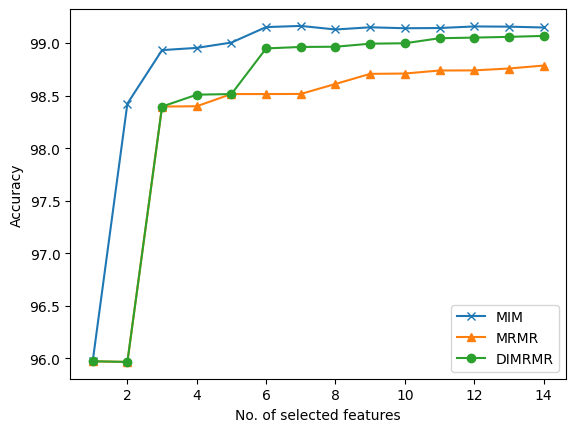

In [39]:
all_columns = [x for x in range(1, 15)]
print(all_columns)
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()